In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data Analysis with Python IV - Merging and Reshaping Data

<!-- PELICAN_BEGIN_SUMMARY -->
Sometimes the way that data is stored in files or databases is not the way you need it for a data processing application.


Pandas along with the Python standard library provide us with a high-level, flexible, and high-performance set of core manipulations
<br>and algorithms to enable us to wrangle data into the right form without much trouble.
<!-- PELICAN_END_SUMMARY -->

**Goals: How to merge/reshape data?**
<br> Data Overview
     - View Data with hidden tabs
     - Combining and Merging Data sets by index
     - Delete/Remove duplicated data after merging
<br> Data Transformation
     - Detecting and Filtering Outliers 
     - Reshaping  
     - Discretization and Binning to group data
     - Index matching data  
<br> Visualize Data:     
    - Group by function
    - Pivoting data
    - Set index  
    - Plot data  

**Example - Reinsurance Premium Loss Data**
- The example is to merge and reshape data from different applications and ultimately determing business reinsurance coverage.
- This is a simplified and hypothetical example, but it's a great illustration of what Python can do for financial analysis. 
- The example data is generated by randomization function
  - ie: df = pd.DataFrame(np.random.randn(10,5),columns = ['A','B','C'])
- The input data is an excel file consisting of 2 tabs: premium and loss and 8 hidden tabs   

**View Excel File with Mulitple Tabs**
- List of tabs : note the display list including hidden tabs
- Number of tabs: using "len" function to count how many tabs in the Excel file
- View each tabs

I found python "len" function is very useful when dealing with Excel files have been updated with many tabs over time. 
<br>We can use Python to view/list/count all the tabs including hidden tabs. 

**Understand the business, what is abnormal value for this business?**
- If average premium per policy is between 10K to 200K, the premium outside this range is invalid
- If maximum ceded reinsurance retention is 500K, the ceded recoverable greater than 500K is invalid 

In [8]:
## View list of tabs including hidden tab
df = pd.ExcelFile('data/analysis4/Premium_Loss.xlsx')
print ('df.sheet_names=%s' % df.sheet_names)

## Count how many tabs in the Excel file 
number_tab = len(df.sheet_names)
print("There are %s tab(s) in the file." % (number_tab)) 

df.sheet_names=['premium', 'loss', 'hidden1', 'hidden2', 'hidden3', 'hidden4', 'hidden5', 'hidden6', 'hidden7', 'hidden8', 'hidden9', 'hidden10']
There are 12 tab(s) in the file.


In [4]:
## Detect duplicated data from the first tab -"premium"
df_premium = pd.read_excel('data/analysis4/Premium_Loss.xlsx', sheet_name = "premium")
print("There are %s policies" % (df_premium.shape[0]))  

df_prem_dupes=df_premium[df_premium.duplicated()]
df_prem_dupes.head()
print("There are %s duplicate policies" % (df_prem_dupes.shape[0])) 

There are 200 policies


,Policy Number,First Name,Last Name,Policy Effective Date,LOB,Policy Type,Premium,Coverage,Excess Coverage,Excess Policy
2,10962,Taisha,Whack,2017-09-19,Dentist,OCC,11308,1000000,3900000,91809.0
4,11339,Ricarda,Hotaka,2017-12-25,Podiatrist,OCC,2651,1000000,3900000,91367.0


There are 2 duplicate policies


In [7]:
## View data from the second tab -"loss"
df_loss = pd.read_excel('data/analysis4/Premium_Loss.xlsx', sheet_name = "loss") 

## slicing can achieve the same results as head()
df_loss[0:5]  

Count_Row=df_loss.shape[0] 
print("There are %s claims" % (Count_Row)) 

,Policy Number,Claim Number,Policy Type,First Name,Last Name,LossDate,LAE,Loss,Premium
0,35033,880247,OCC,Adolph,Iwan,2017-03-17,84373.0,10000000,176966.0
1,35033,880247,OCC,Adolph,Iwan,2017-03-17,84373.0,5000000,176966.0
2,47755,880255,OCC,Cherryl,Aven,2017-11-25,88205.0,4000000,116133.0
3,47755,880255,OCC,Cherryl,Aven,2017-11-25,88205.0,54785,116133.0
4,36838,880258,OCC,Franklin,Maen,2017-03-18,36440.0,54880,65872.0


There are 216 claims


**Merge premium and loss tabs**
- Use Merge function with key identifier "Policy Number"
- Pandas.merge connects rows in DataFrames based on one or more keys
- By default merge does an 'inner' join - the keys in the result are the intersection with prepend X and Y
- Save the merge file to Excel

In [11]:
## Merge tabs - Inner Join
df_premium = df.parse("premium")
df_loss = df.parse("loss")
df_merge = pd.merge(df_premium, df_loss, on='Policy Number')
print("There are %s policies with incurred losses - here are the first 2:" % (df_merge.shape[0]))  
df_merge.head(2)

## Save the merge file to Excel
df_merge.to_excel('data/analysis4/MergePremiiumLoss.xlsx') 

There are 24 policies with incurred losses - here are the first 2:


,Policy Number,First Name_x,Last Name_x,Policy Effective Date,LOB,Policy Type_x,Premium_x,Coverage,Excess Coverage,Excess Policy,Claim Number,Policy Type_y,First Name_y,Last Name_y,LossDate,LAE,Loss,Premium_y
0,10880,Kurtis,Dumm,2017-07-08,Phy,CM,232058,1000000,3900000,96289.0,880206,CM,Kurtis,Dumm,2017-09-24,74793.0,250000,232058.0
1,10948,Florencia,Bilyk,2017-06-05,Podiatrist,CM,5132,1000000,3900000,99671.0,880208,CM,Florencia,Bilyk,2018-04-22,38573.0,800000,5132.0


** Combined tabs - Outer Join**
- Other possible options beside "inner" join are 'left', 'right', and 'outer'. 
- The outer join takes the union of the keys, combining the effect of applying both left and right joins
- ie: Policy 10962 has no associated loss data, the missing loss result marks as NaN

In [19]:
## Combined tabs - Outer Join
df_combine = pd.merge(df_premium, df_loss, on='Policy Number', how='outer')
print("There are %s policies with or without incurred losses - here are the first 2:" % (df_combine.shape[0])) 
df_combine.head(5)

## Save the combine file to Excel
df_combine.to_excel('data/analysis4/CombinePremiiumLoss.xlsx') 

There are 392 policies with or without incurred losses - here are the first 2:


,Policy Number,First Name_x,Last Name_x,Policy Effective Date,LOB,Policy Type_x,Premium_x,Coverage,Excess Coverage,Excess Policy,Claim Number,Policy Type_y,First Name_y,Last Name_y,LossDate,LAE,Loss,Premium_y
0,10880,Kurtis,Dumm,2017-07-08,Phy,CM,232058.0,1000000.0,3900000.0,96289.0,880206.0,CM,Kurtis,Dumm,2017-09-24,74793.0,250000.0,232058.0
1,10962,Taisha,Whack,2017-09-19,Dentist,OCC,11308.0,1000000.0,3900000.0,91809.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,10962,Taisha,Whack,2017-09-19,Dentist,OCC,11308.0,1000000.0,3900000.0,91809.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,11339,Ricarda,Hotaka,2017-12-25,Podiatrist,OCC,2651.0,1000000.0,3900000.0,91367.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,11339,Ricarda,Hotaka,2017-12-25,Podiatrist,OCC,2651.0,1000000.0,3900000.0,91367.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


**Delete/Removing Duplicates after merging data**
- The DataFrame method Duplicated returns a boolean series
  - True means duplicated data
- drop_duplicates returns a DataFrame where the duplicated array is True
  - Our example showing duplicated policy 10962 and 11339, the output showed as "True"
- Both of these methods by default consider all of the columns must be duplicated

In [18]:
df_combine.duplicated().head(10)

0    False
1    False
2     True
3    False
4     True
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [15]:
## View duplicated data after merging
df_dupes=df_combine[df_combine.duplicated()]
print("There are %s duplicate policies - here is the list:" % (df_dupes.shape[0])) 
df_dupes

There are 2 duplicate policies - here is the list:


,Policy Number,First Name_x,Last Name_x,Policy Effective Date,LOB,Policy Type_x,Premium_x,Coverage,Excess Coverage,Excess Policy,Claim Number,Policy Type_y,First Name_y,Last Name_y,LossDate,LAE,Loss,Premium_y
2,10962,Taisha,Whack,2017-09-19,Dentist,OCC,11308.0,1000000.0,3900000.0,91809.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,11339,Ricarda,Hotaka,2017-12-25,Podiatrist,OCC,2651.0,1000000.0,3900000.0,91367.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [16]:
## Drop duplicated data after merging 
df_merge_clean=df_combine.drop_duplicates()
df_merge_clean.head(2)

,Policy Number,First Name_x,Last Name_x,Policy Effective Date,LOB,Policy Type_x,Premium_x,Coverage,Excess Coverage,Excess Policy,Claim Number,Policy Type_y,First Name_y,Last Name_y,LossDate,LAE,Loss,Premium_y
0,10880,Kurtis,Dumm,2017-07-08,Phy,CM,232058.0,1000000.0,3900000.0,96289.0,880206.0,CM,Kurtis,Dumm,2017-09-24,74793.0,250000.0,232058.0
1,10962,Taisha,Whack,2017-09-19,Dentist,OCC,11308.0,1000000.0,3900000.0,91809.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


**Dat Transforamtion**

**Detecting and Filtering Outliers - how to detecting abnormal loss value?**
  - Filtering or transforming outliers by applying array operations
  - Loss should not exceeded 1 million since the policy limit is 1M
  - Use the abs method in column Loss when loss is exceeding 1M 

In [31]:
df_loss_1M = df_loss[df_loss['Loss'] > 1000000]

print("There are %s claims with losses > 1M - here they are:" % (df_loss_1M.shape[0]))  
df_loss_1M[['Claim Number','Loss']]

There are 8 claims with losses > 1M - here they are:


,Claim Number,Loss
0,880247,10000000
1,880247,5000000
2,880255,4000000
6,880016,1500000
8,880205,2500000
13,880489,10000000
16,880754,7000000
23,880979,3000000


**Discretization/Binning and Index Matching**
- Group claim data into discrete bins
- Divide data into 4 bins: 1 to 50000, 50001 to 75000, 75001 to 1000000, and greater than 1000001
- Use "cut" function for data index matching

In [22]:
## Sepaprated loss into bins and print out first five rows
bins = [1, 50000, 75000, 500000, 1000000, 20000000 ]
cats = pd.cut(df_loss['Loss'], bins)

In [33]:
## Count how many claims in each bins - ie. there are 150 claims in the loss range from $75K to $500K
pd.value_counts(cats)

(75000, 500000]        150
(50000, 75000]          35
(1, 50000]              18
(1000000, 20000000]      8
(500000, 1000000]        5
Name: Loss, dtype: int64

In [23]:
## Show first 3 claims according to the matching discrete loss bin categories
pd.cut(df_loss['Loss'], bins, right=False).head(3)

0    [1000000, 20000000)
1    [1000000, 20000000)
2    [1000000, 20000000)
Name: Loss, dtype: category
Categories (5, interval[int64]): [[1, 50000) < [50000, 75000) < [75000, 500000) < [500000, 1000000) < [1000000, 20000000)]

In [35]:
## Group claim data into discrete loss bins by assigning group names, ie. first loss is a Clash coverage etc.
group_names = ['Layer1', 'Layer2', 'Layer3', 'XOL','Clash']
pd.cut(df_loss['Loss'], bins, labels=group_names).head()

0     Clash
1     Clash
2     Clash
3    Layer2
4    Layer2
Name: Loss, dtype: category
Categories (5, object): [Layer1 < Layer2 < Layer3 < XOL < Clash]

**Example - a list of claim file**
- Group claims by line of business
- Set Index
- Identify min, max value by group

In [28]:
df_claims = pd.read_excel('data/analysis4/Claim.xlsx')
df_claims[0:2]

,Claim_Number,Loss_Date,LAE,Loss,Premium,LOB
0,883745,2016-09-24,95846.0,147030,165910.0,Podiatrist
1,884654,2016-05-14,95514.0,121666,72314.0,Podiatrist


In [29]:
## Group claims by Line of Business LOB and set Loss_Date as index
df_claims.set_index('Loss_Date', inplace=True)
df_claims_by_lob = df_claims.groupby('LOB')

In [30]:
## View claim by LOB - Nurse 
df_claims_by_lob.get_group('Nurse').head(2)

,Claim_Number,LAE,Loss,Premium,LOB
Loss_Date,,,,,
2016-03-28,889851,25422.0,161796,208103.0,Nurse
2016-01-01,889591,75493.0,279318,81236.0,Nurse


**Maxium, Mininum and Average value by group**

In [31]:
df_claims_by_lob.max()

,Claim_Number,LAE,Loss,Premium
LOB,,,,
Dentist,889215,98396.0,290832,240383.0
Hospital,886684,99984.0,298038,245159.0
Nurse,889877,98914.0,279318,246635.0
Physician,881144,266019.0,10000000,248063.0
Podiatrist,884888,98013.0,294633,248669.0


**Sumarize Statistics Value by Describe function**
- Describe generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values
- Transpose the results
- Save the result to Excel called claim_distribution.xlsx

In [32]:
## Traspose the describe 
transport= df_claims_by_lob.describe().T
transport.head()

LOB                       Dentist       Hospital          Nurse  \
Claim_Number count      39.000000      78.000000      21.000000   
             mean   887691.615385  884071.576923  889543.666667   
             std       696.825494    1885.292368     164.153993   
             min    886716.000000  881331.000000  889258.000000   
             25%    887096.500000  882258.750000  889453.000000   

LOB                     Physician     Podiatrist  
Claim_Number count      39.000000      39.000000  
             mean   880730.512821  884066.743590  
             std       391.910763     426.330531  
             min    880016.000000  883421.000000  
             25%    880307.500000  883704.000000

In [33]:
## Save the describe result to excel
df_claims_by_lob.describe().T.to_excel('data/analysis4/claim_distribution.xlsx')

**Loss distribution by LOB - use groupby plot**
- Use groupby function to plot the result
- This can be very helpful, that means we can reuse this code when reload the data from other application on the weekly, monthly, or quarterly basis
- To label y-axis in million, I found a code to do so.  I plan to explore more codes about label plt in the future blogs.

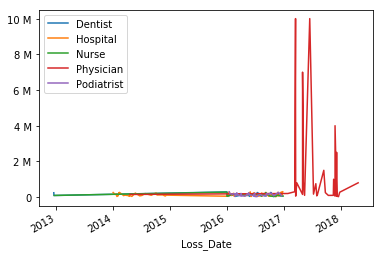

In [34]:
## How to add dollars signs to the y-axis
## ref: https://stackoverflow.com/questions/40566413/matplotlib-pyplot-auto-adjust-unit-of-y-axis
from matplotlib.ticker import FuncFormatter
def y_fmt(y, pos):
    decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
    suffix  = ["G", "M", "k", "" , "m" , "u", "n"  ]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
#                     print(val, signf)
                    if str(val).split(".")[1] == "0":
                       return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                return tx.format(val=val, suffix=suffix[i])

                #return y
    return y

def y_fmt2(x, y):
    return '{:2.2e}'.format(x).replace('e', 'x10^')


ax = df_claims_by_lob['Loss'].plot(legend=True)

ax[0].yaxis.set_major_formatter(FuncFormatter(y_fmt))
# ax[0].yaxis.set_major_formatter(FuncFormatter(y_fmt2))
plt.show()